## Initial Setup
This section imports the necessary libraries such as Pandas, NumPy, Matplotlib, and Seaborn which are essential for data manipulation and visualization in this notebook.


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
Here, we load the cleaned data from a CSV file. This file has been previously prepared to ensure accurate analysis. The `parse_dates` parameter is used to convert date strings into datetime objects automatically.


In [193]:
# Load the CSV file
cleaned_data = pd.read_csv('Data/SourceFiles/Documented/cleaned_data.csv', parse_dates=['Date'])

## Data Overview
Display the first few rows of the dataset to get an understanding of the available data columns and inspect the data types to ensure they are loaded correctly.


In [194]:
# Display the first few rows of the data
print(cleaned_data.head())
# Display column names to ensure all needed columns are present
print(cleaned_data.columns)

        Date  Russia_Total  Change  Ukraine_Total  Change.1  Ratio RU/UA  \
0 2022-02-24             0     NaN              0       NaN     0.000000   
1 2022-02-25            52    52.0             59      59.0     0.881356   
2 2022-02-26           107    55.0             88      29.0     1.215909   
3 2022-02-27           161    54.0             96       8.0     1.677083   
4 2022-02-28           321   160.0            147      51.0     2.183673   

   Russia_Destroyed  Ukraine_Destroyed  Russia_Damaged  Ukraine_Damaged  ...  \
0                 0                  0               0                0  ...   
1                25                 27               5                5  ...   
2                42                 36               6                4  ...   
3                71                 38               6                4  ...   
4               139                 53               7                4  ...   

   Ukraine_Logistics  Russia_Armor  Ukraine_Armor  Russia_Anti

## Data Summary
Generate a statistical summary of the datasets. This includes count, mean, std (standard deviation), min, quartiles, and max values for each column which helps in understanding the distribution of data.


In [195]:
# Get a summary of the datasets
print(cleaned_data.describe())

                                Date  Russia_Total      Change  Ukraine_Total  \
count                            775    775.000000  774.000000     775.000000   
mean   2023-03-17 23:59:59.999999744   9111.423226   19.720930    3031.383226   
min              2022-02-24 00:00:00      0.000000  -65.000000       0.000000   
25%              2022-09-05 12:00:00   5478.000000    0.000000    1556.000000   
50%              2023-03-18 00:00:00   9678.000000    9.000000    3101.000000   
75%              2023-09-27 12:00:00  12297.000000   33.000000    4502.000000   
max              2024-04-08 00:00:00  15264.000000  279.000000    5526.000000   
std                              NaN   3879.981356   28.574673    1527.558413   

         Change.1  Ratio RU/UA  Russia_Destroyed  Ukraine_Destroyed  \
count  774.000000   775.000000        775.000000         775.000000   
mean     7.139535     3.164233       6022.892903        1958.929032   
min    -30.000000     0.000000          0.000000         

## Missing Data Check
Identify and visualize missing data within the dataset, if any. A heatmap is used to provide a clear visual representation of missing values across different columns.


In [196]:
# Check for missing values
print(cleaned_data.isnull().sum())

Date                                  0
Russia_Total                          0
Change                                1
Ukraine_Total                         0
Change.1                              1
Ratio RU/UA                           0
Russia_Destroyed                      0
Ukraine_Destroyed                     0
Russia_Damaged                        0
Ukraine_Damaged                       0
Ukraine_Abandoned                     0
Russia_Abandoned                      0
Russia_Captured                       0
Ukraine_Captured                      0
Russia_Tanks                          0
Ukraine_Tanks                         0
Russia_Tank_Capture                   0
Ukraine_Tank_Capture                  0
Russia_AFV                            0
Ukraine_AFV                           0
Russia_AFV_Capture                    0
Ukraine_AFV_Capture                   0
Russia_IFV                            0
Ukraine_IFV                           0
Russia_APC                            0


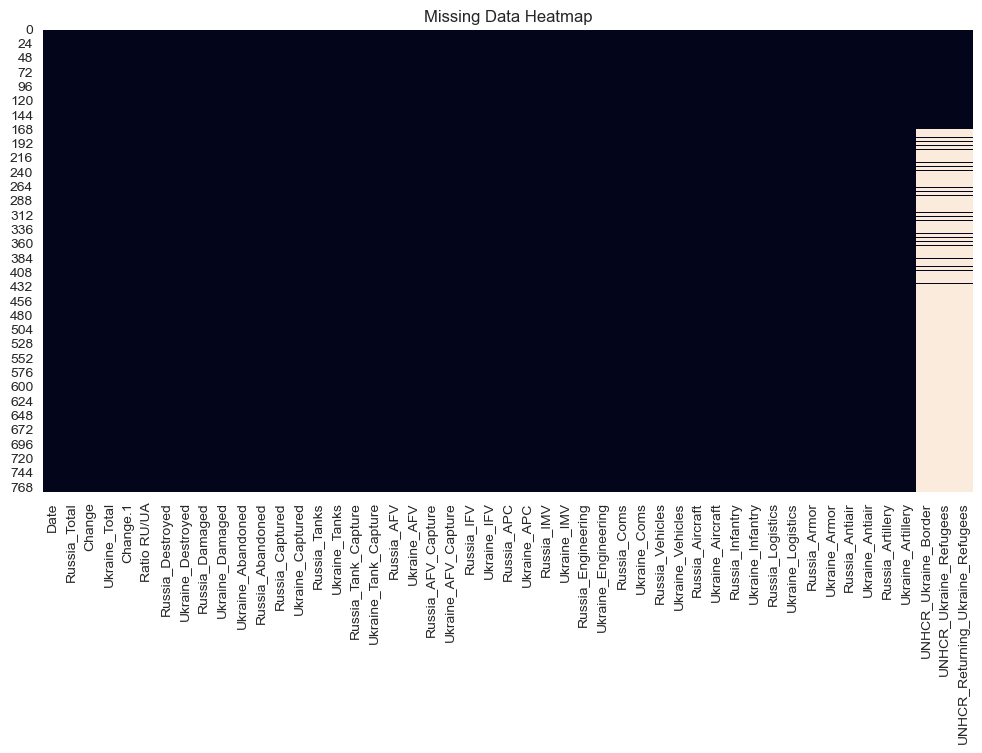

In [197]:
# Enhanced Visualization with Plots of Missing Data
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

## Cleaning Data
Drop rows with missing values and visualize the dataset post-cleanup to confirm that all missing values have been addressed.


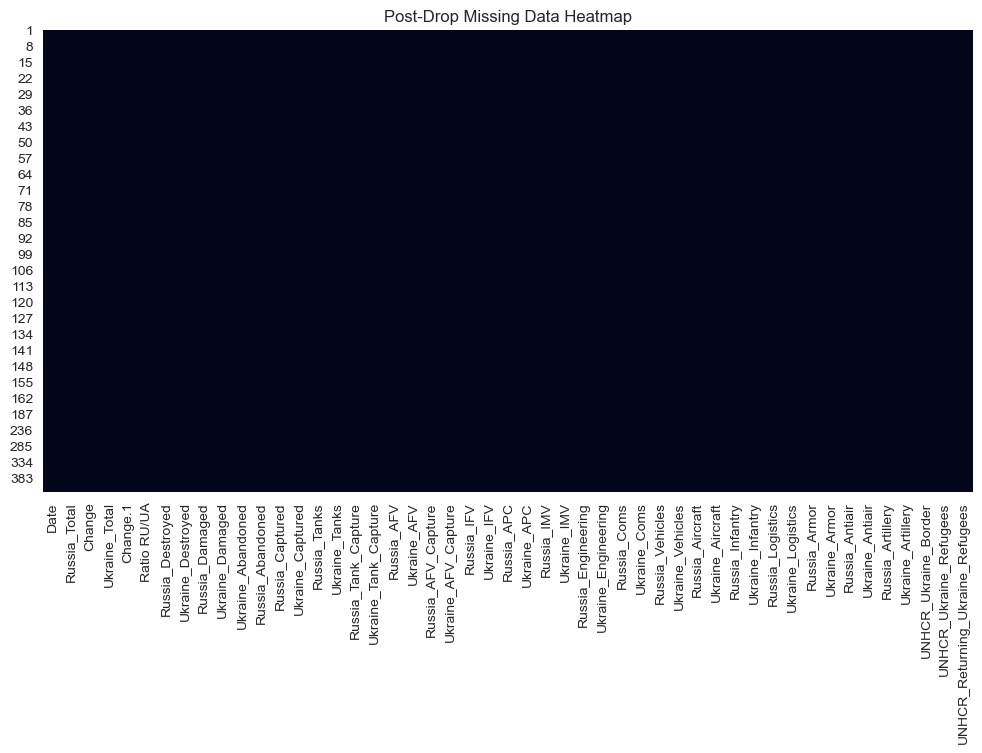

In [198]:
cleaned_data.dropna(inplace=True) # drop
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_data.isnull(), cbar=False)
plt.title('Post-Drop Missing Data Heatmap')
plt.show()

## Visualization of Total Losses Over Time
Create line plots to visualize the total losses for Russia and Ukraine over time. This helps in understanding trends and identifying any significant changes in the data.


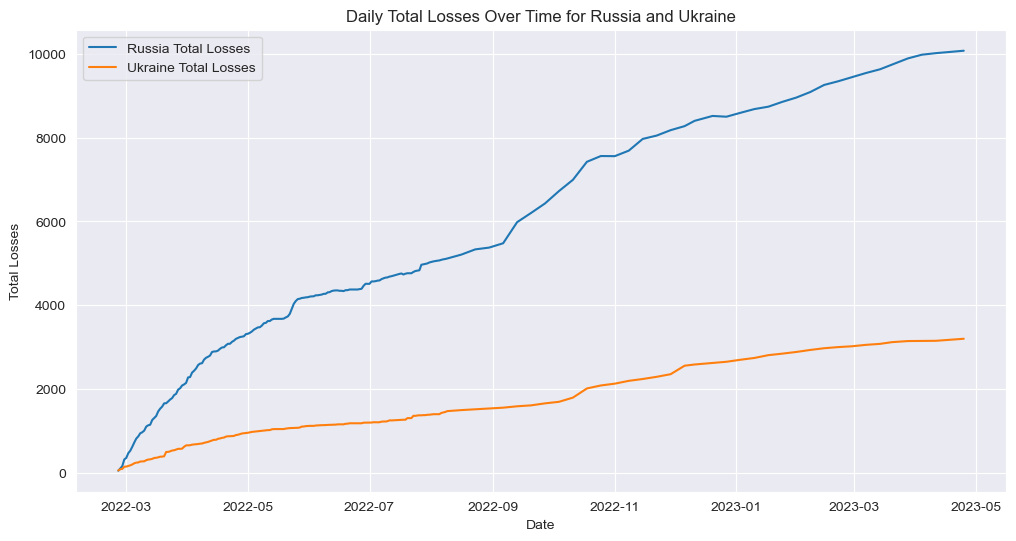

In [199]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='Date', y='Russia_Total', label='Russia Total Losses')
sns.lineplot(data=cleaned_data, x='Date', y='Ukraine_Total', label='Ukraine Total Losses')
plt.title('Daily Total Losses Over Time for Russia and Ukraine')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.legend()
plt.show()


## Enhanced Date Axis Formatting
Enhance the visualization by customizing the date format on the X-axis, making it more readable and adjusting the locator to better represent the timeline of events.


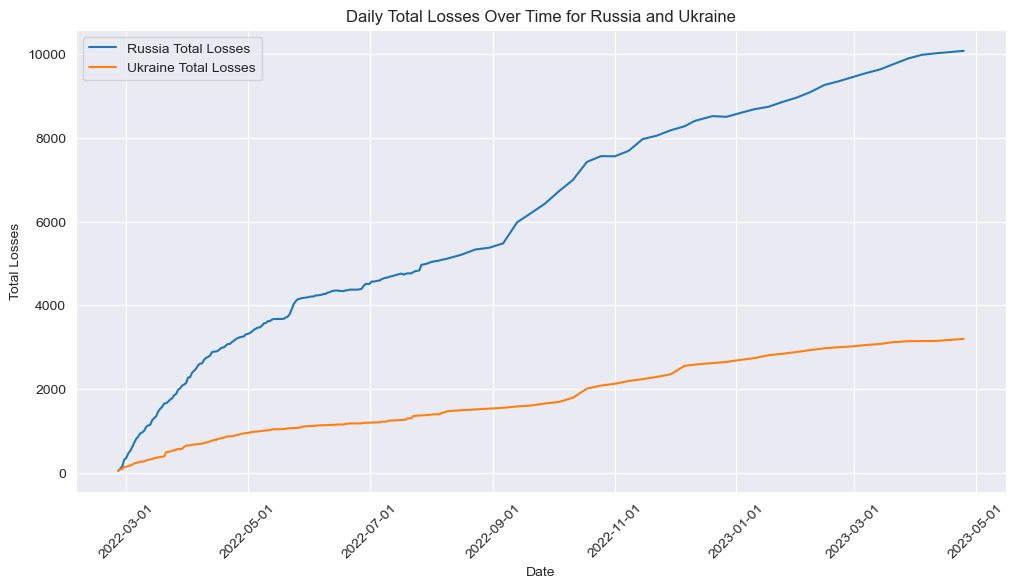

In [200]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='Date', y='Russia_Total', label='Russia Total Losses')
sns.lineplot(data=cleaned_data, x='Date', y='Ukraine_Total', label='Ukraine Total Losses')
plt.title('Daily Total Losses Over Time for Russia and Ukraine')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the date display
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Yearly Data Visualization
Adjust the visualization to emphasize yearly trends by modifying the major locator of the X-axis to display data year by year.


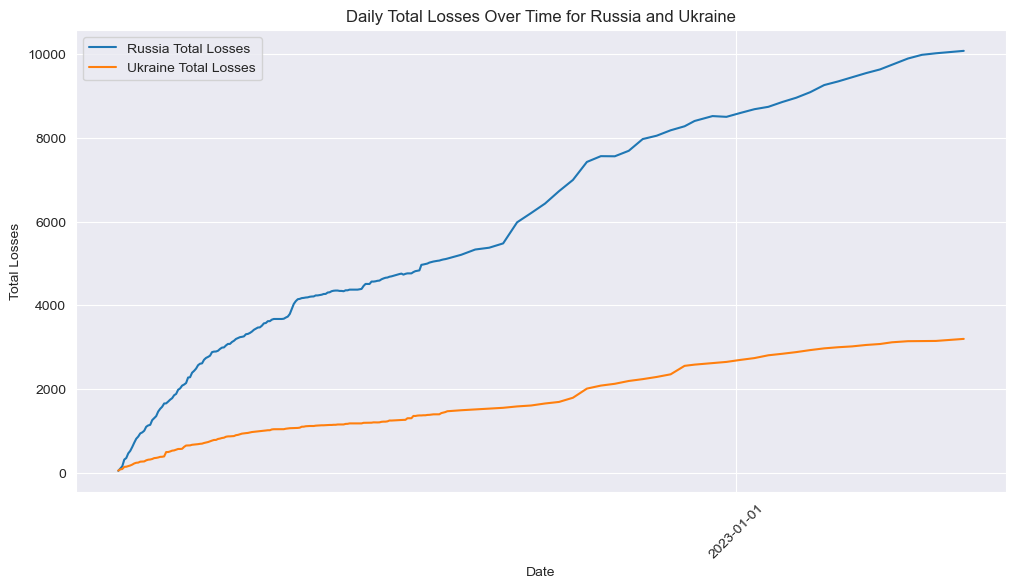

In [201]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='Date', y='Russia_Total', label='Russia Total Losses')
sns.lineplot(data=cleaned_data, x='Date', y='Ukraine_Total', label='Ukraine Total Losses')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Locate marks per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as 'Year-Month-Day'
plt.title('Daily Total Losses Over Time for Russia and Ukraine')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Moving Average Visualization
This section applies a 7-day moving average to smooth out the daily fluctuations in the data. This smoothing helps to identify the broader trends in the total losses over time for Russia and Ukraine. Additionally, key events are annotated to highlight significant dates.


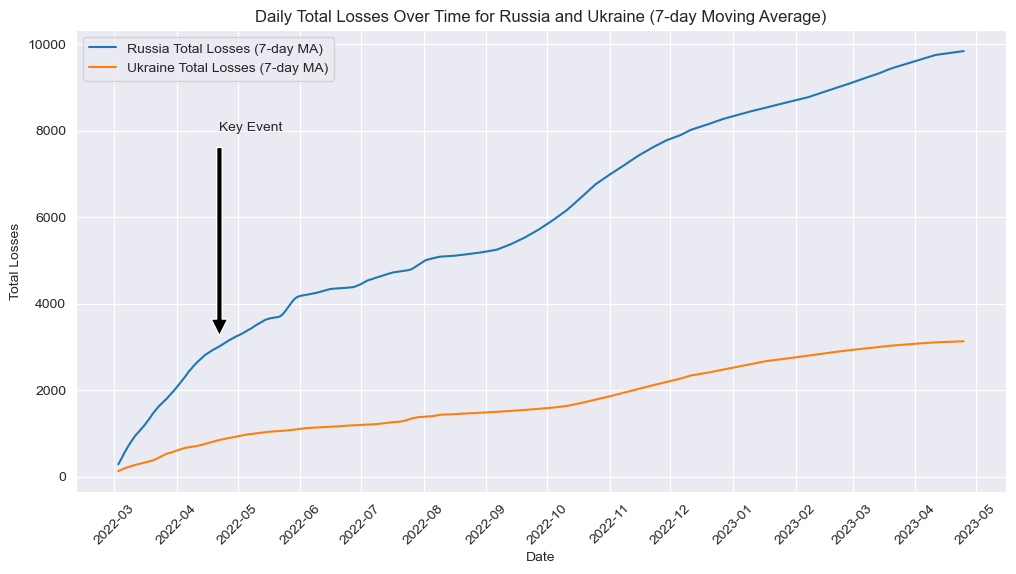

In [202]:
# Calculating 7-day moving average for smoothing
cleaned_data['Russia_MA'] = cleaned_data['Russia_Total'].rolling(window=7).mean()
cleaned_data['Ukraine_MA'] = cleaned_data['Ukraine_Total'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='Date', y='Russia_MA', label='Russia Total Losses (7-day MA)')
sns.lineplot(data=cleaned_data, x='Date', y='Ukraine_MA', label='Ukraine Total Losses (7-day MA)')
plt.title('Daily Total Losses Over Time for Russia and Ukraine (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Organizes the x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formats the date display to show year-month
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Adds a grid for better readability

# Example of adding an annotation
important_date = pd.to_datetime('2022-04-22')
plt.annotate('Key Event', xy=(important_date, cleaned_data.loc[cleaned_data['Date']==important_date, 'Russia_MA'].values[0]),
             xytext=(important_date, 8000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

#TESTING


The output from the seasonal_decompose function in time series analysis typically consists of several components, each providing specific insights about the underlying patterns in the data. Here’s a breakdown of what each component can tell us:
1. Trend

    Description: This component smooths out the data to show the underlying trend without short-term fluctuations. It represents the long-term progression of the data, highlighting increases, decreases, or stable periods over time.
    Interpretation: In the context of conflict data like total losses, the trend component can show whether the intensity of conflict is increasing, decreasing, or has periods of escalation and de-escalation. An upward trend might indicate a worsening conflict, while a downward trend could suggest a de-escalation.

2. Seasonal

    Description: This shows the seasonal pattern or cyclic behavior of the data. "Seasonal" here refers to patterns that repeat at known regular intervals less than a year, which could be daily, weekly, monthly, etc.
    Interpretation: For conflict data, if any regular patterns exist—such as increased conflict on certain days of the week or times of the month—this component would highlight those. It’s important to note that 'seasonal' patterns in conflict data are not as common as in economic or environmental data unless they are tied to specific recurring events or strategic decisions that follow a cyclical pattern.

3. Residual

    Description: The residuals represent the portion of the data that cannot be explained by the trend or seasonal components. These are essentially the irregularities or random variations left after accounting for the regular components.
    Interpretation: High residuals can indicate anomalies or unusual data points that might be of particular interest. For example, spikes in residuals might correspond to unexpected events such as major battles, significant strategic shifts, or external interventions.

4. Observed

    Description: This is your original data as observed, displayed to allow comparisons to the decomposed components.
    Interpretation: The observed curve is useful for reference, allowing you to compare how well the trend and seasonal components explain the overall data behavior.

Utilizing These Components:

    Strategic Planning and Analysis: Understanding these components can help in planning and response strategies, particularly in contexts like conflict resolution or military logistics.
    Predictive Insights: By understanding trends and seasonal cycles, predictive models can be better specified to forecast future conditions.
    Anomaly Detection: Identifying and investigating high residual values can lead to insights about special cases or outliers that warrant further study.

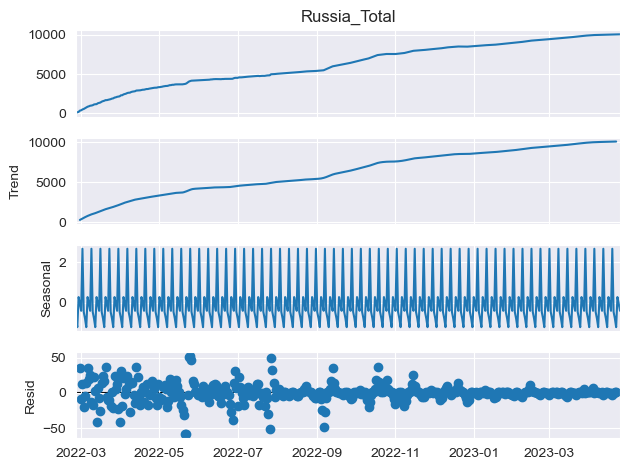

In [203]:
import pandas as pd

# Assuming 'Date' is the column with date information and your DataFrame is named cleaned_data
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data.set_index('Date', inplace=True)

# Resample data to daily frequency, filling missing values as needed
cleaned_data_daily = cleaned_data.resample('D').asfreq()

# If you need to fill missing numeric values, you might choose to forward-fill, backward-fill, or interpolate
cleaned_data_daily['Russia_Total'] = cleaned_data_daily['Russia_Total'].interpolate()  # Linear interpolation

# Now your data has a daily frequency implicitly
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(cleaned_data_daily['Russia_Total'].dropna(), model='additive')  # Ensure to drop any remaining NaNs which might disrupt the analysis
fig = decomposition.plot()
plt.show()




## Reflections and Conclusions

This analysis has provided valuable insights into the total losses over time for Russia and Ukraine, illustrating significant trends and fluctuations through various visualizations. While the visualizations provide a clear picture of the data at hand, it's important to consider the limitations of the available data, such as potential reporting biases and the accuracy of the source data. Future analyses could expand on this by incorporating additional data sources and applying more advanced statistical techniques to further validate the findings.

#TODO: EDIT
